# HIỂN THỊ DANH SÁCH CÁC ẢNH CỦA TẬP DỮ LIỆU

1. Yêu cầu chung: Hiển thị một số ảnh trong bộ dữ liệu theo từng phân loại
  + Ví dụ minh họa:
  <IMG SRC = 'https://editor.analyticsvidhya.com/uploads/762161_OSvbuPLy0PSM2nZ62SbtlQ.png'>
2. Yêu cầu cụ thể:
  - Input: tập tin .csv, trong đó mỗi dòng tương ứng với (đường dẫn) một ảnh và categoryID. Ví dụ tập tin CarDataset-Splits-1-Train.csv
  - Output: như hình minh họa ở trên, mỗi dòng tương ứng với một CategoryID, số lượng ảnh, kích thước ảnh là các tham số với giá trị mặc định như sau
    + NumImgsPerRow = 10
    + ImgHeight = ImgWidth = 150
  - Các ảnh mỗi dòng được chọn ngẫu nhiên ở mỗi lần chạy

3. Nộp bài: SV share notebook. Các bài nộp sớm sẽ được full điểm. Deadline:

4. Bài làm đạt yêu cầu sẽ được paste vào notebook với ghi nhận đóng góp từ tác giả.

## Thông tin của tác giả, ngày cập nhật

In [1]:
import os
import csv

root_dir = r"D:\ML\Public"

output_csv = "image_paths.csv"
data = []

for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path): 
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.isfile(file_path):  
                data.append({"Path": file_path, "CategoryID": folder})

with open(output_csv, mode="w", newline="", encoding="utf-8") as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=["Path", "CategoryID"])
    writer.writeheader()
    writer.writerows(data)

print(f"CSV file created: {output_csv}")

CSV file created: image_paths.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from PIL import Image
from matplotlib.image import imread

def display_images(csv_file, num_imgs_per_row=10, img_height=150, img_width=150):
    df = pd.read_csv(csv_file)

    categories = df['CategoryID'].unique()

    plt.figure(figsize=(num_imgs_per_row * 1.5, len(categories) * 2))

    for i, category in enumerate(categories):
        category_imgs = df[df['CategoryID'] == category]['Path'].tolist()

        selected_imgs = random.sample(category_imgs, min(len(category_imgs), num_imgs_per_row))

        ax = plt.subplot(len(categories), num_imgs_per_row + 1, i * (num_imgs_per_row + 1) + 1)
        ax.text(0.5, 0.5, category, ha='center', va='center', fontsize=12, fontweight='bold')
        ax.axis("off")
        for j, img_path in enumerate(selected_imgs):
            ax = plt.subplot(len(categories), num_imgs_per_row + 1, i * (num_imgs_per_row + 1) + j + 2)

            try:
                img = Image.open(img_path)
                img = img.resize((img_width, img_height))  
                ax.imshow(img)
                ax.axis("off")
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                ax.axis("off")

    plt.tight_layout()
    plt.show()

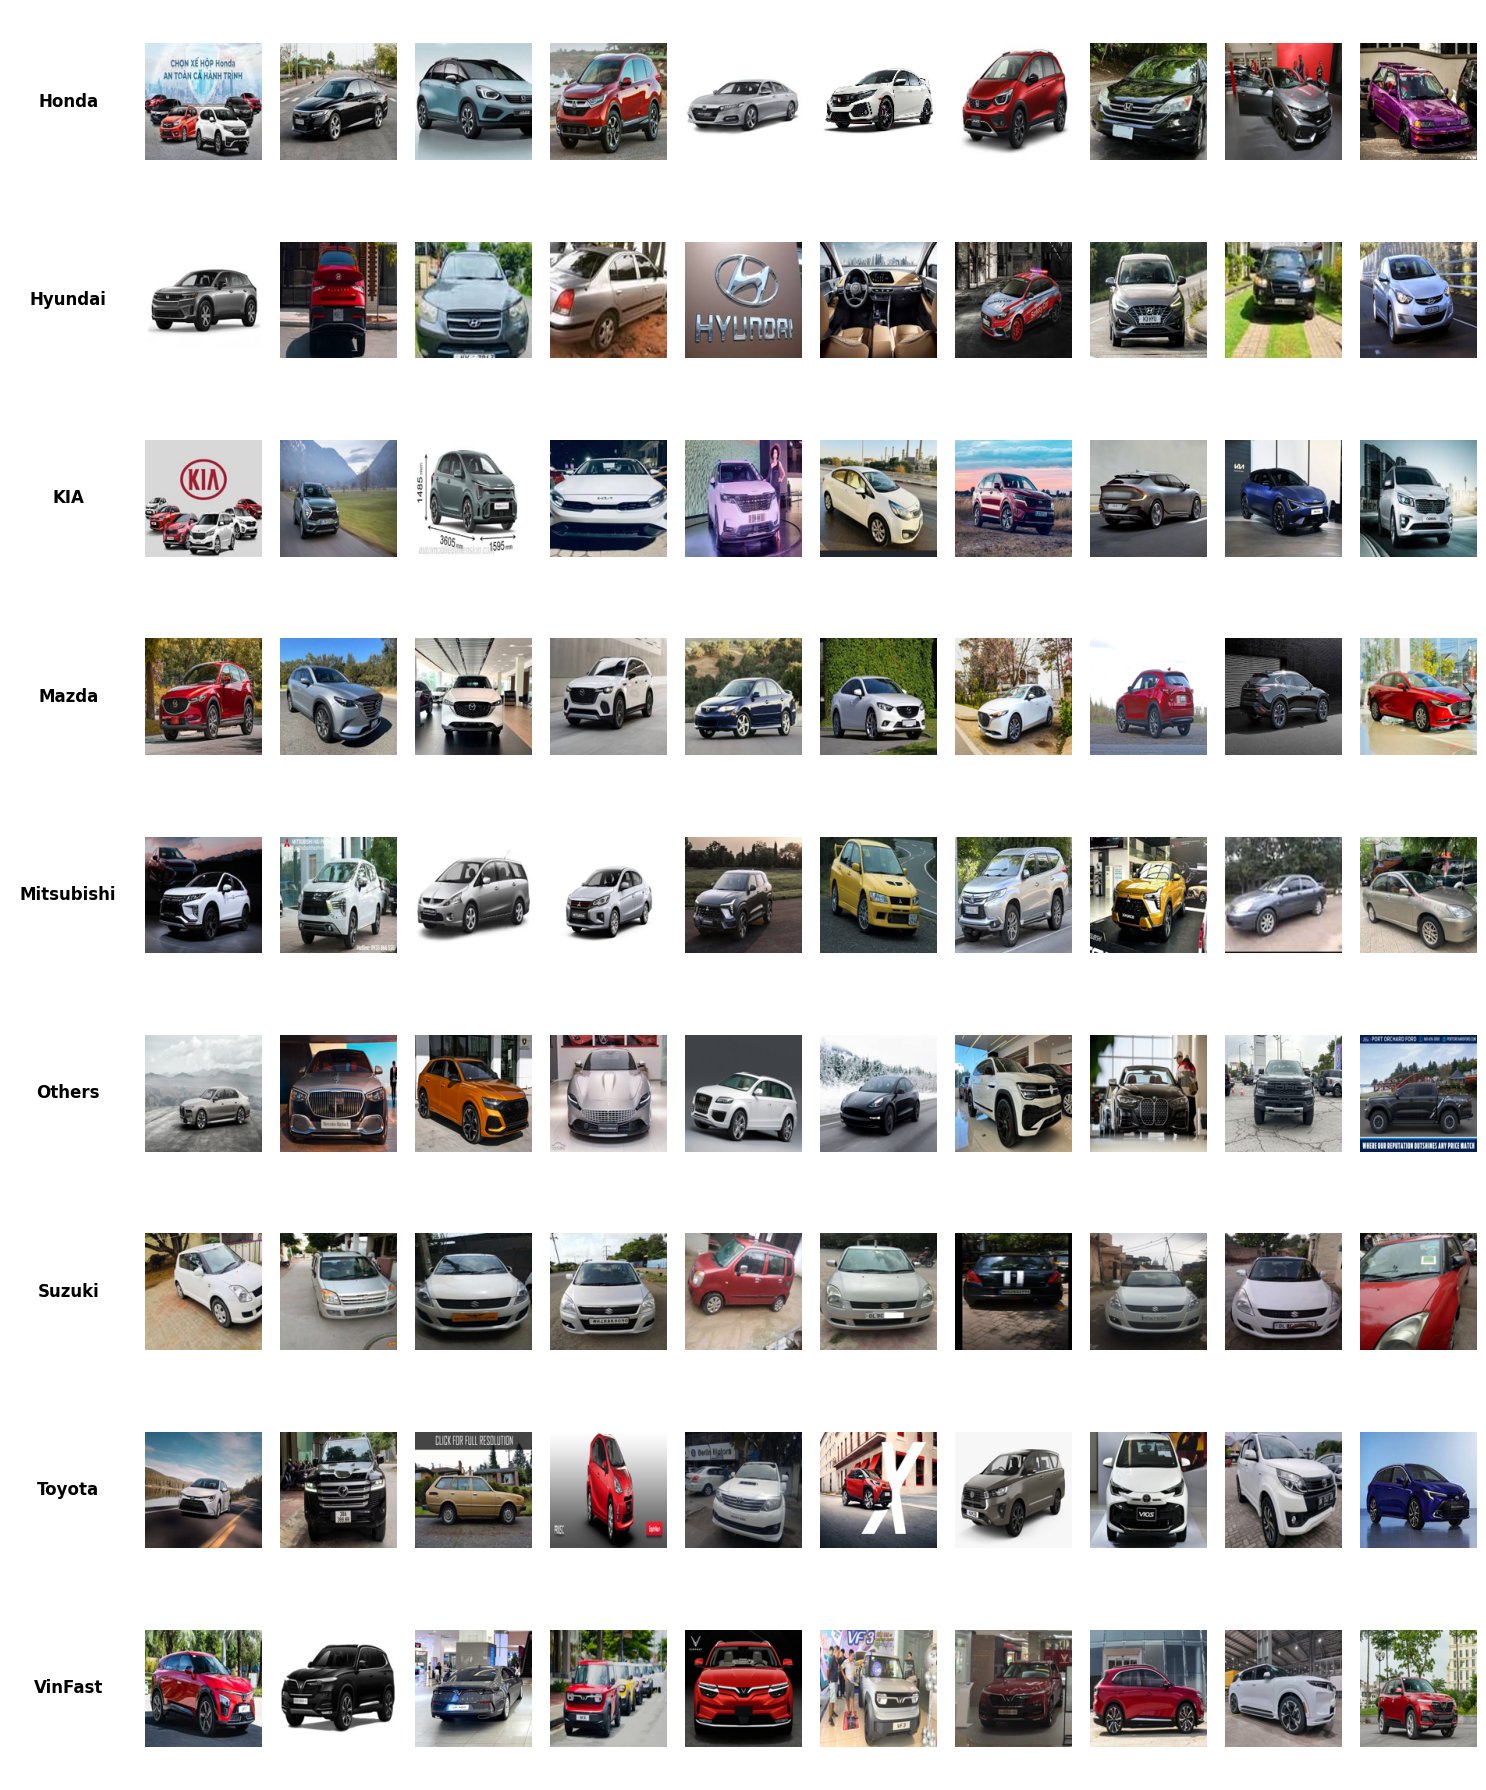

In [5]:
csv_file = r"D:\ML\Public\image_paths.csv"  
display_images(csv_file)